# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration</a></div><div class="lev1 toc-item"><a href="#Scikit-Learn" data-toc-modified-id="Scikit-Learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scikit-Learn</a></div><div class="lev1 toc-item"><a href="#H2O" data-toc-modified-id="H2O-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>H2O</a></div><div class="lev2 toc-item"><a href="#RandomForest" data-toc-modified-id="RandomForest-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RandomForest</a></div><div class="lev2 toc-item"><a href="#GLM" data-toc-modified-id="GLM-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>GLM</a></div><div class="lev1 toc-item"><a href="#PyMC3" data-toc-modified-id="PyMC3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PyMC3</a></div>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Data Exploration 

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,505.0,3.620667,8.608572,0.00906,0.08221,0.25915,3.67822,88.9762
avg_number_of_rooms,505.0,6.284059,0.703195,3.56100,5.88500,6.20800,6.62500,8.7800
distance_to_employment_centers,505.0,3.794459,2.107757,1.12960,2.10000,3.19920,5.21190,12.1265
property_tax_rate,505.0,408.459406,168.629992,187.00000,279.00000,330.00000,666.00000,711.0000
pupil_teacher_ratio,505.0,18.461782,2.162520,12.60000,17.40000,19.10000,20.20000,22.0000
house_value,505.0,22.529901,9.205991,5.00000,17.00000,21.20000,25.00000,50.0000


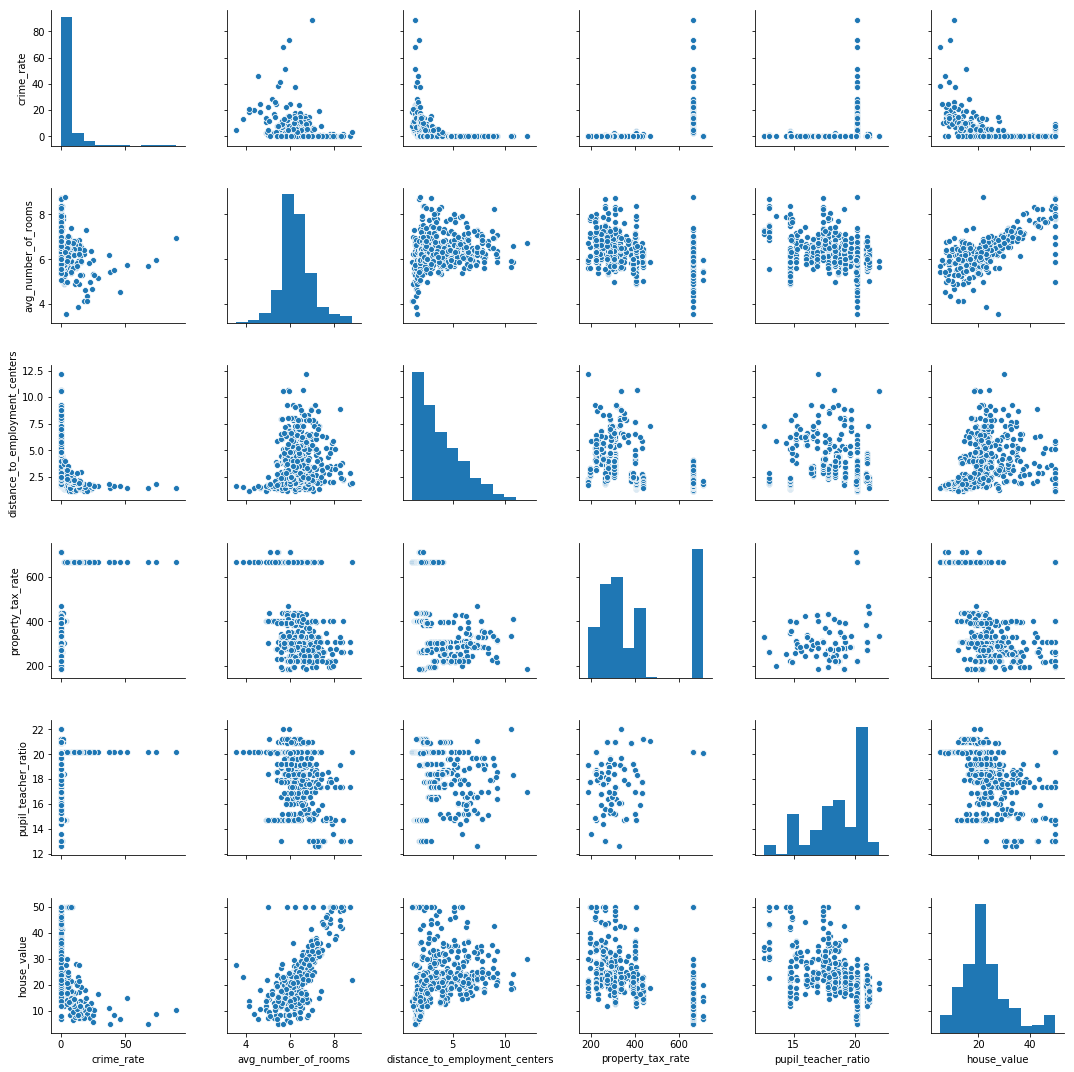

In [6]:
sns.pairplot(df);

In [7]:
X, y = df[df.columns.difference(['house_value'])], df.house_value

In [8]:
test_X = X.mean(axis=0).values
test_X

array([  6.28405941,   3.62066653,   3.79445861, 408.45940594,
        18.46178218])

# Scikit-Learn 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
lr = LinearRegression(normalize=True, n_jobs=-1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [13]:
y_predict = lr.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_predict))

5.510846174030534

In [14]:
y_predict = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predict))

6.74629453434012

In [15]:
y_predict_sklearn = lr.predict(X)
y_true_sklearn = y
np.sqrt(mean_squared_error(y_true_sklearn, y_predict_sklearn))

5.779103601067821

In [16]:
lr.intercept_

-4.947384962119855

In [17]:
lr.coef_

array([ 7.64162156, -0.1180171 , -0.17423067, -0.01026193, -0.83149416])

In [18]:
lr.predict(np.atleast_2d(test_X))[0]

22.442159291891237

In [ ]:
test_y = lr.intercept_+test_X.dot(lr.coef_)
test_y

22.442159291891237

In [ ]:
with open('model_sklearn.pkl', 'wb') as f:
    model = {'model': lr, 'std_err': np.sqrt(mean_squared_error(y_true_sklearn, y_predict_sklearn))}
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

# H2O 

In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-0ubuntu0.16.04.1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplidpbrjv
  JVM stdout: /tmp/tmplidpbrjv/h2o_jpsilva_started_from_python.out
  JVM stderr: /tmp/tmplidpbrjv/h2o_jpsilva_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_jpsilva_5xwnv5
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [ ]:
frame = h2o.import_file('housing.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
frame

crime_rate,avg_number_of_rooms,distance_to_employment_centers,property_tax_rate,pupil_teacher_ratio,house_value
0.02731,6.421,4.9671,242,17.8,21.6
0.02729,7.185,4.9671,242,17.8,34.7
0.03237,6.998,6.0622,222,18.7,33.4
0.06905,7.147,6.0622,222,18.7,36.2
0.02985,6.43,6.0622,222,18.7,28.7
0.08829,6.012,5.5605,311,15.2,22.9
0.14455,6.172,5.9505,311,15.2,27.1
0.21124,5.631,6.0821,311,15.2,16.5
0.17004,6.004,6.5921,311,15.2,18.9
0.22489,6.377,6.3467,311,15.2,15


## RandomForest 

In [ ]:
rf = H2ORandomForestEstimator(nfolds=10)

In [ ]:
rf.train(y='house_value', training_frame=frame)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1540784136373_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 19.961250724213
RMSE: 4.467801553808427
MAE: 2.903500074537354
RMSLE: 0.20132490458371358
Mean Residual Deviance: 19.961250724213

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 21.370570556249607
RMSE: 4.622831443633826
MAE: 3.024194306553
RMSLE: 0.20751862206657135
Mean Residual Deviance: 21.370570556249607
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
mae,3.0263343,0.2729885,4.0781403,2.921486,2.5906403,3.0933402,2.992383,2.9343102,2.905268,2.730907,2.8258827,3.1909847
mean_residual_deviance,21.245455,6.6548347,40.95687,25.410957,9.877759,30.902403,25.335989,23.735655,14.445087,11.91458,11.655652,18.219584
mse,21.245455,6.6548347,40.95687,25.410957,9.877759,30.902403,25.335989,23.735655,14.445087,11.91458,11.655652,18.219584
r2,0.7407473,0.0753217,0.5312457,0.6433084,0.8402495,0.7195219,0.6696306,0.6677099,0.8650444,0.853807,0.7774009,0.8395551
residual_deviance,21.245455,6.6548347,40.95687,25.410957,9.877759,30.902403,25.335989,23.735655,14.445087,11.91458,11.655652,18.219584
rmse,4.4982877,0.7109367,6.3997555,5.0409284,3.1428902,5.558993,5.033487,4.871925,3.8006694,3.4517503,3.4140375,4.2684402
rmsle,0.2042210,0.0243103,0.2909297,0.2074842,0.1515719,0.2077176,0.1810845,0.2094931,0.1757142,0.2144547,0.2046360,0.1991238


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2018-10-28 22:35:43,3.768 sec,0.0,nan,nan,nan
,2018-10-28 22:35:43,3.780 sec,1.0,4.6454530,3.4071799,21.5802339
,2018-10-28 22:35:43,3.790 sec,2.0,5.0460594,3.3807380,25.4627158
,2018-10-28 22:35:43,3.804 sec,3.0,5.5059159,3.5200887,30.3151094
,2018-10-28 22:35:43,3.812 sec,4.0,5.7549110,3.5813015,33.1190008
---,---,---,---,---,---,---
,2018-10-28 22:35:43,4.171 sec,46.0,4.4370349,2.9053069,19.6872789
,2018-10-28 22:35:43,4.180 sec,47.0,4.4318796,2.8967397,19.6415572
,2018-10-28 22:35:43,4.187 sec,48.0,4.4426966,2.8987151,19.7375530
,2018-10-28 22:35:43,4.195 sec,49.0,4.4511403,2.8974117,19.8126497



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
avg_number_of_rooms,595957.6875000,1.0,0.4345336
crime_rate,242420.0312500,0.4067739,0.1767569
distance_to_employment_centers,184921.6562500,0.3102933,0.1348328
pupil_teacher_ratio,184121.8437500,0.3089512,0.1342497
property_tax_rate,164067.0,0.2752997,0.1196270


In [ ]:
test_data = {k:v for k,v in zip(X.columns.tolist(), test_X)}
test_frame = h2o.H2OFrame(test_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
rf.predict(test_frame)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
21.0975


In [ ]:
y_predict_h2o = rf.predict(frame).as_data_frame()
y_true_h2o = y

drf prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
np.sqrt(mean_squared_error(y_true_h2o, y_predict_h2o))

2.9263923368171265

In [ ]:
rf.rmse(train=True, xval=True)

{'train': 4.467801553808427, 'xval': 4.622831443633826}

## GLM 

In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator

In [ ]:
glm = H2OGeneralizedLinearEstimator(nfolds=10)

In [ ]:
glm.train(y='house_value', training_frame=frame)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1540784136373_2


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 33.26118256770706
RMSE: 5.767250867415693
MAE: 3.799320788960675
RMSLE: 0.364821617366834
R^2: 0.606760250504143
Mean Residual Deviance: 33.26118256770706
Null degrees of freedom: 504
Residual degrees of freedom: 499
Null deviance: 42714.138685689206
Residual deviance: 16796.897196692065
AIC: 3216.845387871385

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 34.42154457116875
RMSE: 5.866987691411049
MAE: 3.862649837880781
RMSLE: NaN
R^2: 0.593041542137799
Mean Residual Deviance: 34.42154457116875
Null degrees of freedom: 504
Residual degrees of freedom: 499
Null deviance: 42882.25978464855
Residual deviance: 17382.88000844022
AIC: 3234.1626638625658
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
mae,3.8664289,0.4441448,3.5391414,4.6968923,3.8652527,3.1125343,4.008335,3.559379,3.4484937,3.0596514,4.304879,5.06973
mean_residual_deviance,34.440903,11.011724,30.479704,65.54098,25.838291,17.447607,40.766827,22.068468,27.913603,17.218107,39.96481,57.170624
mse,34.440903,11.011724,30.479704,65.54098,25.838291,17.447607,40.766827,22.068468,27.913603,17.218107,39.96481,57.170624
null_deviance,4288.226,913.03217,4451.2744,2735.6833,5438.274,2953.4814,3184.2407,4526.7944,3628.5132,3465.471,5523.9214,6974.607
r2,0.5477276,0.2014082,0.6253603,-0.2021786,0.7649469,0.6928101,0.2877024,0.7952129,0.5996892,0.7421678,0.550994,0.6205712
residual_deviance,1738.288,544.69385,1615.4243,3145.967,1240.2379,907.2756,2201.4084,926.8757,1451.5073,843.68726,2477.818,2572.6782
rmse,5.727505,0.9045951,5.5208426,8.095738,5.083138,4.1770334,6.3848906,4.697709,5.2833323,4.149471,6.3217726,7.5611258
rmsle,0.2726053,0.0476869,0.2305990,NaN,0.3311538,0.3722020,0.2894468,0.2460643,0.2141989,0.2062121,NaN,0.2909653


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-10-28 22:35:45,0.000 sec,0,42714.1384950,84.5824525


/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/jpsilva/miniconda/envs/futurice/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


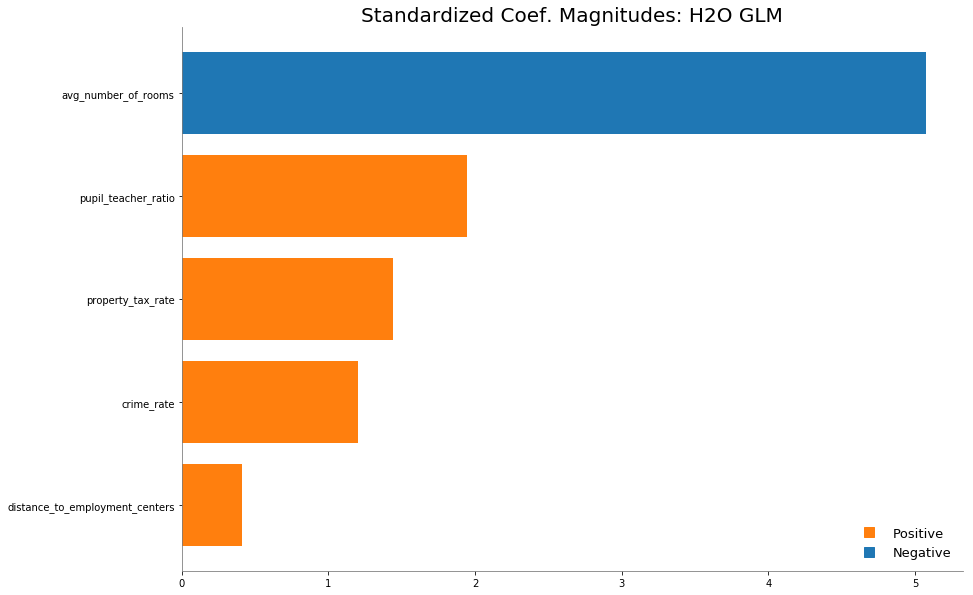

In [ ]:
glm.std_coef_plot()

In [ ]:
glm.coef()

{'Intercept': -1.4628802351100738,
 'crime_rate': -0.1396336179500851,
 'avg_number_of_rooms': 7.213444352993998,
 'distance_to_employment_centers': -0.19494817423740243,
 'property_tax_rate': -0.008558117463910749,
 'pupil_teacher_ratio': -0.8989380509611787}

In [ ]:
glm.rmse()

5.767250867415693

# PyMC3 

In [ ]:
from pymc3 import  *
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt

In [ ]:
n_dim = X_train.shape[1]

# build model, fit, and check trace
with pm.Model() as model:
    # intercept
    alpha = pm.Normal('alpha', mu=0, sd=10)
    
    # coefficients (aka predictors)
    beta = pm.Normal('beta', mu=0, sd=10, shape=(n_dim,))
    
    mu = alpha + tt.dot(X, beta)
    sd = pm.HalfCauchy('sd', beta=10)
    y_model = pm.Normal('y', mu=mu, sd=sd, observed=y)

In [ ]:
# inference
with model:
    trace = pm.sample(8000, tune=1000, cores=4)

pm.traceplot(trace);

Sampling 4 chains:  91%|█████████▏| 32907/36000 [02:36<00:14, 212.09draws/s]

In [ ]:
intercept_pymc3 = trace.alpha.mean(axis=0)
coeff_pymc3 = trace.beta.mean(axis=0)

In [ ]:
intercept_pymc3 + test_X.dot(coeff_pymc3)

In [ ]:
y_predict_pymc3 = intercept_pymc3+X.dot(coeff_pymc3)
y_true_pymc3 = y

In [ ]:
np.sqrt(mean_squared_error(y_true_pymc3, y_predict_pymc3))

In [ ]:
trace.sd.mean()

In [ ]:
from matplotlib import gridspec

# posterior predictive checks on original data
ppc = pm.sample_ppc(trace, samples=1000, model=model)

def plot_predict(ppc_y, y):
    plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3)
    ax0 = plt.subplot(gs[0, 0:2])
    ax0.plot(ppc_y.T, color='gray', alpha=.1)
    ax0.plot(y, color='r')
    
    ax1 = plt.subplot(gs[0, 2])
    for ppc_i in ppc_y:
        pm.kdeplot(ppc_i, ax=ax1, color='gray', alpha=.1)
    pm.kdeplot(y, ax=ax1, color='r')
    plt.tight_layout()
    return ax0, ax1

ax0, ax1 = plot_predict(ppc['y'], y)
ax1.set_ylim(0, .8);

In [ ]:
with open('model_pymc3.pkl', 'wb') as f:
    model = {'model': 'y ~ intercept+XT*coeffs', 'coeffs': coeff_pymc3, 'intercept': intercept_pymc3, 'col_order': X.columns.tolist()}